# El método del codo y el factor de la silueta del clustering

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score


In [18]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2= np.array ([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

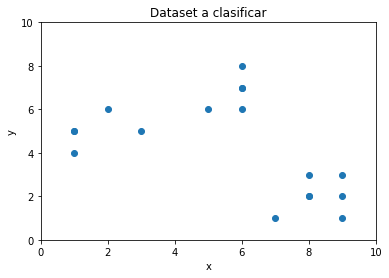

In [19]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

ValueError: 'c' argument has 9 elements, which is inconsistent with 'x' and 'y' with size 1.

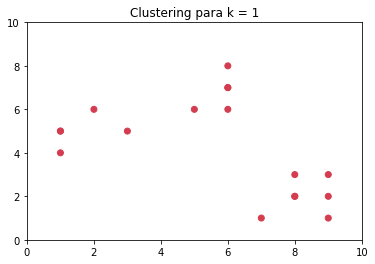

In [27]:
max_k = 10 ## maximo numero de clusters que vamos a crear
K=range(1, max_k)
ssw = []
cmap = plt.cm.get_cmap("Spectral")
color_palette = [cmap(float(i)/max_k) for i in K]
#color_palette = [plt.cm.spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers= pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum (np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis=1))
    ssw.append(ssw)
    
    label_color = [color_palette[i] for i in labels]
    
    ## Fabricaremos una silueta para cada cluster
    ## Por seguridad no hacemos silueta si k =1 o k=len(X)
        
    if 1<k<len(X):
        ##Crear un subplot de una fila y dos columnas
        fig, (axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        
        #El primer subplot contendra la silueta, que puede tener valores desde -1 a 1
        #En nuestro caso, ya controlamos que los valores estan entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        
        #El numero de clusteres a insertar determinara el tamaño de cada barra
        #El coeficiente (n_clusters+1)*10 sera el espacio en blanco que dejaremos
        #entre siluetas individuales de cada cluster para seprarlas
        axis1.set_ylim([0, len(X)+ (k+1)*10])
        
        silhouette_avg = silhouette_score(X, labels)
        print("* para k = ", k, " El promedio de la silueta es de: ", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels ==i]
            print("    - Para i = ", i+1, " la silueta del cluster vale: ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
            
            #Calculamos donde calcular la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.range(y_lower, y_upper),0, ith_cluster_sv, facecolor = color, alpha=0.7)
            
            #Etiquedamos dicho cluster con el numero en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguente cluster del gráfico
            y_lower = y_upper + 10 #dejamos vacias 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del cluster")
        
        ##Fin de la representación de la silueta
        
    ##Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1, x2, c=label_color)
    plt.scatter(centers[0], centers[1], c=color_palette, maker="x")
    plt.show()
    